<a href="https://colab.research.google.com/github/chu-ise/378A-2022/blob/main/homework/homework_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW01: Python Basics for Text

In [2]:
%%capture
%pip install gdown numpy pandas matplotlib

In [3]:
import gdown
id = "1brXucwHS0k0g59Apj9PRhySezisrgo8c"
data_file = "korean_news.csv"
gdown.download(id=id, output=data_file, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1brXucwHS0k0g59Apj9PRhySezisrgo8c
To: /content/korean_news.csv
100%|██████████| 12.9M/12.9M [00:00<00:00, 51.8MB/s]


'korean_news.csv'

In [4]:
import pandas as pd
df = pd.read_csv(data_file)
df.head()

,id,doc_id,title,author,publisher,date,topic,original_topic,category,text
0,4044817,NWRW2000000001.3667,조선일보 2019년 기사,최현묵 기자,조선일보,20190730,사회,"정치,정부|경제/산업,거시경제,무역분쟁|경제/산업,거시경제,무역협정|정치,외교,외교관계",신문>전국 종합지,"정부 ""일본이 중과 희토류 분쟁때 했던 말, 되돌려주고 싶다""\n""희토류 수출 제한..."
1,3009579,NWRW1900000036.37413,경향신문 2014년 기사,박효순기자,경향신문사,20140911,미용/건강,인물>인사,신문 > 전국 종합지,박 대통령 새 주치의에 서울대 서창석 교수\n박근혜 대통령의 새 주치의에 서창석 서...
2,2290675,NWRW1900000007.23380,조선일보 2015년 기사,김성현,조선일보사,20151116,경제,"정치,특정 지역의 자치|경제/산업,기업정보",신문 > 전국 종합지,"행남자기, 목포 주민의 사랑 잊지 말길\n전남 목포에서 73년간 향토기업으로서 맥을..."
3,654141,NLRW1900000071.3353,광주매일신문 2017년 기사,오승지,광주매일신문,20170823,IT/과학,경제,신문 > 지역 종합지,세계 첫 '해킹 원천차단 광케이블' 개발\n광주지역 한 광통신업체가 세계 최초로 해...
4,1026229,NLRW1900000145.17890,영남일보 2011년 기사,남정현,영남일보,20111212,사회,미분류||,신문 > 지역 종합지,12.11/문경/문경시의회 가처분 수용 갈등사태 장기화 조짐\n문경시의회 의장단 불...


1. 뉴스 다운로드
2. 경제 뉴스만 추출
3. 뉴스 길이 분포 그래프 생성
4. 영어와 한국어 각각 단어수 분포 그래프 생성
5. 연도별 불확실성 단어 시계열 그래프 생성


In [5]:
#경제 뉴스만 추출
df = df.loc[:'경제']
df

,id,doc_id,title,author,publisher,date,topic,original_topic,category,text
0,4044817,NWRW2000000001.3667,조선일보 2019년 기사,최현묵 기자,조선일보,20190730,사회,"정치,정부|경제/산업,거시경제,무역분쟁|경제/산업,거시경제,무역협정|정치,외교,외교관계",신문>전국 종합지,"정부 ""일본이 중과 희토류 분쟁때 했던 말, 되돌려주고 싶다""\n""희토류 수출 제한..."
1,3009579,NWRW1900000036.37413,경향신문 2014년 기사,박효순기자,경향신문사,20140911,미용/건강,인물>인사,신문 > 전국 종합지,박 대통령 새 주치의에 서울대 서창석 교수\n박근혜 대통령의 새 주치의에 서창석 서...
2,2290675,NWRW1900000007.23380,조선일보 2015년 기사,김성현,조선일보사,20151116,경제,"정치,특정 지역의 자치|경제/산업,기업정보",신문 > 전국 종합지,"행남자기, 목포 주민의 사랑 잊지 말길\n전남 목포에서 73년간 향토기업으로서 맥을..."
3,654141,NLRW1900000071.3353,광주매일신문 2017년 기사,오승지,광주매일신문,20170823,IT/과학,경제,신문 > 지역 종합지,세계 첫 '해킹 원천차단 광케이블' 개발\n광주지역 한 광통신업체가 세계 최초로 해...
4,1026229,NLRW1900000145.17890,영남일보 2011년 기사,남정현,영남일보,20111212,사회,미분류||,신문 > 지역 종합지,12.11/문경/문경시의회 가처분 수용 갈등사태 장기화 조짐\n문경시의회 의장단 불...
...,...,...,...,...,...,...,...,...,...,...
4100,630771,NLRW1900000065.2544,광주매일신문 2011년 기사,오경은,광주매일신문,20110719,생활,사회,신문 > 지역 종합지,올 여름 더 무덥다...'폭염 비상'\n광주·전남지방에 한 여름 '폭염비상'이 걸렸...
4101,1396476,NPRW1900000038.3760,내일신문 2016년 기사,내일신문,내일신문,20160510,사회,BH,신문 > 전문지,"갈길 급한 교육현안, 19대 국회와 침몰\n공교육정상화법이나 대학구조개혁법안 등 주..."
4102,1793420,NPRW1900000060.15522,매일경제 2018년 기사,송광섭성승훈,매일경제신문사,20180609,정치,법원·검찰·경찰,신문 > 전문지,"허익범 특검 ""실세 정치인도 필요하면 조사""\n허익범 특별검사(59·사법연수원 13..."
4103,4022225,NPRW2000000004.53638,스포츠서울 2019년 기사,서장원,스포츠서울,20190429,스포츠,"스포츠,야구,한국프로야구|스포츠,야구,일본프로야구|",신문>전문지,"야구를 통해 수학을 설명한다! '수학을 품은 야구공' 발간\n고교 수학 교사, 프로..."


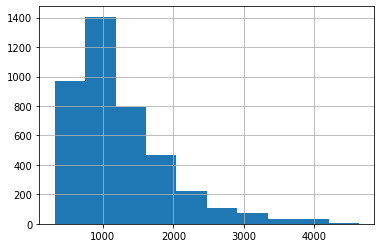

In [6]:
#뉴스 길이 분포 그래프 생성
df['text_len'] = df['text'].str.len()
df['text_len'].hist(bins=10)

In [7]:
#영어와 한국어 각각 단어수 분포 그래프 생성
import re

docs = df['text']


In [8]:
values = "".join(str(i) for i in docs.values)
values

Output hidden; open in https://colab.research.google.com to view.

In [14]:
pattern = re.compile(r'[ㄱ-ㅎ|가-힣|]+')
results = re.findall(pattern, values)
results

['정부',
 '일본이',
 '중과',
 '희토류',
 '분쟁때',
 '했던',
 '말',
 '되돌려주고',
 '싶다',
 '희토류',
 '수출',
 '제한',
 '조치가',
 '일본만',
 '대상으로',
 '한',
 '것이라면',
 '세계무역기구',
 '규정을',
 '위반하는',
 '것이다',
 '일본이',
 '년',
 '전',
 '중국과',
 '무역',
 '분쟁을',
 '벌일',
 '때',
 '중국의',
 '경제',
 '보복',
 '조치를',
 '비판하며',
 '했던',
 '발언들을',
 '우리',
 '정부가',
 '모아',
 '카드뉴스',
 '형식으로',
 '발표했다',
 '한국에',
 '대해',
 '수출',
 '제한',
 '조치를',
 '취하고',
 '있는',
 '일본의',
 '이율배반적인',
 '모습을',
 '드러내',
 '일본',
 '조치의',
 '부당성을',
 '알리겠다는',
 '의도다',
 '산업통상자원부는',
 '일',
 '정부는',
 '년',
 '희토류',
 '분쟁',
 '시',
 '일본',
 '정부의',
 '주장을',
 '되돌려',
 '주고',
 '싶습니다',
 '란',
 '자료를',
 '발표했다',
 '여기에는',
 '희토류',
 '수출',
 '제한',
 '조치가',
 '일본만',
 '대상으로',
 '한',
 '것이라면',
 '규정을',
 '위반하는',
 '것이며',
 '세계',
 '각국과',
 '공동으로',
 '중국에',
 '시정을',
 '요구할',
 '것',
 '년',
 '오하타',
 '일본',
 '경제산업성',
 '장관',
 '중국과',
 '일본의',
 '관계',
 '악화는',
 '세계경제에',
 '부정적',
 '영향을',
 '미친다',
 '년',
 '노다',
 '재무상과',
 '마에하라',
 '외상',
 '는',
 '등의',
 '발언이',
 '담겼다',
 '당시',
 '일본이',
 '중국을',
 '비판한',
 '논리는',
 '지금',
 '우리',
 '정부가',
 '일본을',
 '비판하는',
 '논리와',
 '거의',
 '같다는',


In [15]:
genres_unique = pd.unique(results)
genres_unique

array(['정부', '일본이', '중과', ..., '발전소로', '균형발전', '나서주기를'], dtype=object)

In [ ]:
final = pd.DataFrame
num = 0
a = []
for i in genres_unique:
  a.append(results.count(genres_unique[num]))
  num += 1


KeyboardInterrupt: ignored